In [ ]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


# Data Understanding/Preprocessing

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
# classes
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
# turn 2d array to 1d
y_train = y_train.flatten()
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
# function to print out given amt of images from x/y training data
def show_img(x, y, amt):
  for i in range(amt):
    plt.figure(figsize = (10, 2))
    plt.imshow(x[i])
    plt.xlabel(classes[y[i]])
    plt.show()


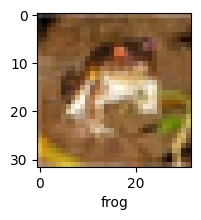

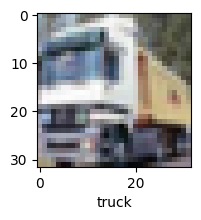

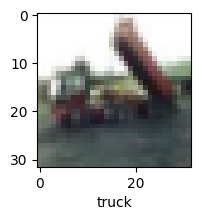

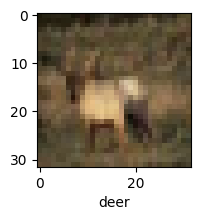

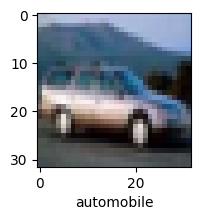

In [ ]:
show_img(x_train, y_train, 5)

##### Normalizing Pixel Values


In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
x_train.min()

0.0

In [ ]:
x_train.max()

1.0

# CNN Architecture

In [ ]:
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.models import Sequential, load_model
from tensorflow.keras.layers import BatchNormalization

In [ ]:
model = Sequential()

In [ ]:
# n filters, 3x3 pixels in size, stride of 1 (moving 1 pixel at a time)
# hyperparameters have been fine tuned several times to achieve greater accuracy
# i.e. adding more layers, adjusting filter value, etc
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10))

In [ ]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [ ]:
model2 = Sequential()

# n filters, 3x3 pixels in size, stride of 1 (moving 1 pixel at a time)
# hyperparameters have been fine tuned several times to achieve greater accuracy
# i.e. adding more layers, adjusting filter value, etc
model2.add(Conv2D(16, (3,3), activation='relu', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(Conv2D(16, (3,3), activation='relu'))
model2.add(Dropout(rate=0.4))
model2.add(Conv2D(16, (3,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(16, (3,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(rate=0.4))

model2.add(Flatten())

model2.add(Dense(16, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training

**Model 1:**

10 epochs: loss = 1.4203, acc = 0.6020

15 epochs: loss = 1.3587, acc = 0.6347

20 epochs: acc was lower



**Model 1.2 :**

10 epochs: loss = 0.7625, accuracy = 0.7308

15 epochs: loss = 0.5140, acc = 0.8171 -- not optimal due to val acc/loss issues


In [ ]:
#history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

**Model 2:**

10 epochs: loss = 2.3555, acc = 0.4265



In [ ]:
history2 = model2.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 129s 81ms/step - loss: 1.8222 - accuracy: 0.3097 - val_loss: 1.7239 - val_accuracy: 0.3551
Epoch 2/15
1563/1563 [==============================] - 125s 80ms/step - loss: 1.5062 - accuracy: 0.4405 - val_loss: 1.6474 - val_accuracy: 0.3827
Epoch 3/15
1563/1563 [==============================] - 118s 76ms/step - loss: 1.3876 - accuracy: 0.4937 - val_loss: 1.4574 - val_accuracy: 0.4847
Epoch 4/15
1563/1563 [==============================] - 126s 81ms/step - loss: 1.3114 - accuracy: 0.5265 - val_loss: 1.3557 - val_accuracy: 0.5114
Epoch 5/15
1563/1563 [==============================] - 119s 76ms/step - loss: 1.2556 - accuracy: 0.5504 - val_loss: 1.2009 - val_accuracy: 0.5687
Epoch 6/15
1563/1563 [==============================] - 120s 77ms/step - loss: 1.2247 - accuracy: 0.5626 - val_loss: 1.1591 - val_accuracy: 0.5902
Epoch 7/15
1563/1563 [==============================] - 124s 79ms/step - loss: 1.1893 - accuracy: 0.5765 - val_loss: 1

In [ ]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 8s 25ms/step - loss: 0.9015 - accuracy: 0.7054


[0.901465117931366, 0.7053999900817871]

# Model Evaluation

In [ ]:
#history.history

In [ ]:
"""
fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='blue', label='val loss')
fig.suptitle("Model 1 Loss", fontsize=20)
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
"""

In [ ]:
"""
fig = plt.figure()
plt.plot(history.history['accuracy'], color='red', label='acc')
plt.plot(history.history['val_accuracy'], color='blue', label='val acc')
fig.suptitle("Model 1 Accuracy", fontsize=20)
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
"""

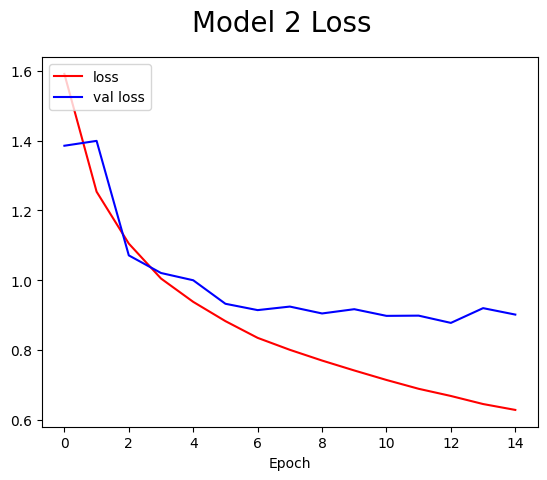

In [ ]:
fig = plt.figure()
plt.plot(history2.history['loss'], color='red', label='loss')
plt.plot(history2.history['val_loss'], color='blue', label='val loss')
fig.suptitle("Model 2 Loss", fontsize=20)
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

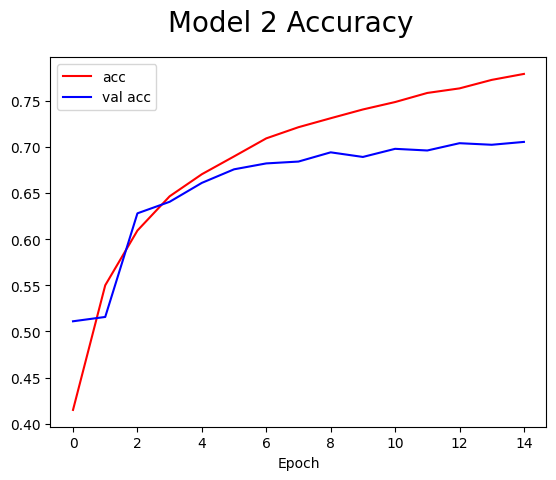

In [ ]:
fig = plt.figure()
plt.plot(history2.history['accuracy'], color='red', label='acc')
plt.plot(history2.history['val_accuracy'], color='blue', label='val acc')
fig.suptitle("Model 2 Accuracy", fontsize=20)
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# predict label of test data
y_pred = model2.predict(x_test)
y_pred[:10]

313/313 [==============================] - 4s 12ms/step


array([[2.18475368e-04, 5.39182802e-04, 2.75841053e-03, 8.47138464e-01,
        1.52560114e-03, 1.19978666e-01, 4.88229608e-03, 4.65153826e-05,
        2.27514412e-02, 1.60906013e-04],
       [1.41768740e-03, 2.90672481e-02, 2.09416612e-07, 1.22373052e-07,
        1.89063633e-06, 8.27221491e-09, 1.26506237e-07, 5.71131835e-08,
        9.69254851e-01, 2.57689680e-04],
       [1.63000971e-01, 1.20947897e-01, 5.27754845e-03, 4.53678779e-02,
        4.92285565e-03, 1.42866950e-02, 2.19660811e-02, 4.94980672e-03,
        4.93906081e-01, 1.25374153e-01],
       [8.25360477e-01, 1.11896091e-03, 1.36822034e-02, 1.46691902e-02,
        1.43118100e-02, 3.78007826e-04, 1.42452831e-03, 3.67694214e-04,
        1.27711803e-01, 9.75228380e-04],
       [1.10091435e-06, 9.14414195e-05, 8.97887815e-03, 1.47969071e-02,
        2.60685503e-01, 8.76053795e-03, 7.06650436e-01, 3.39425969e-05,
        8.86698643e-08, 1.14257750e-06],
       [6.29071874e-05, 9.52914615e-06, 1.60852284e-03, 1.20591028e-02,
   

In [ ]:
y_classes = [np.argmax(elmnt) for elmnt in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 5, 6, 3, 9]

In [ ]:
y_test = y_test.reshape(-1, )
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [ ]:
def model_output(typ, amt):
  for i in range(amt):
    print(classes[typ[i]])


In [ ]:
# what model predicted
model_output(y_classes, 10)

cat
ship
ship
airplane
frog
frog
dog
frog
cat
truck


In [ ]:
# actual values
model_output(y_test, 10)

cat
ship
ship
airplane
frog
frog
automobile
frog
cat
automobile


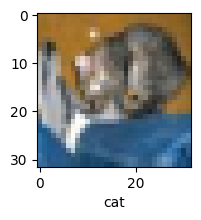

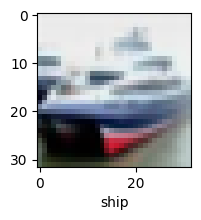

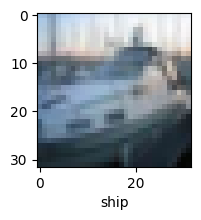

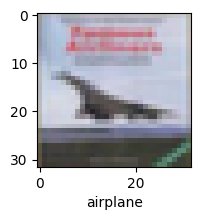

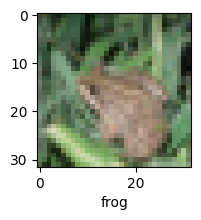

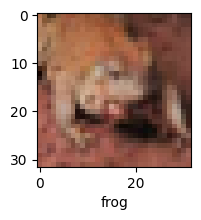

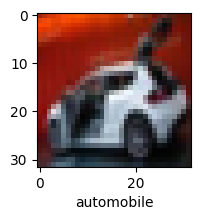

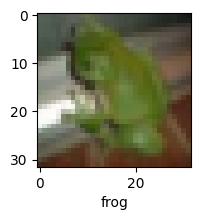

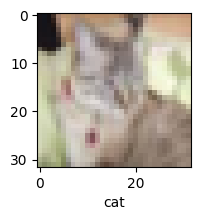

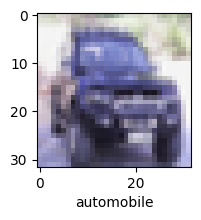

In [ ]:
# actual values
show_img(x_test, y_test, 10)

# Resnet Training

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import layers
from keras.optimizers import Adam

### Training with no additional layers:

In [ ]:
inputs = tf.keras.layers.Input(shape=(32, 32, 3))

resized_inputs = tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (224, 224)))(inputs)

pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(224, 224, 3),
                                                  weights='imagenet')
pretrained_model.trainable = False

outputs = pretrained_model(resized_inputs)

# classification layer
outputs = tf.keras.layers.GlobalAveragePooling2D()(outputs)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="classification")(outputs)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
  33/1563 [..............................] - ETA: 2:19 - loss: 2.3319 - accuracy: 0.0985

KeyboardInterrupt: 

### Adding layers

In [ ]:
inputs = tf.keras.layers.Input(shape=(32,32,3))

resized_inputs = tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (224, 224)))(inputs)

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224, 224, 3),
                   weights='imagenet')(resized_inputs)

pretrained_model.trainable = False

x = tf.keras.layers.GlobalAveragePooling2D()(pretrained_model)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)


outputs = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)

model2 = tf.keras.Model(inputs=inputs, outputs=outputs)

model2.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
history2 = model2.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
1563/1563 [==============================] - 583s 347ms/step - loss: 1.0269 - accuracy: 0.6384 - val_loss: 0.9760 - val_accuracy: 0.6564
Epoch 2/3
1563/1563 [==============================] - 535s 342ms/step - loss: 0.5947 - accuracy: 0.7973 - val_loss: 0.8396 - val_accuracy: 0.7286
Epoch 3/3
1563/1563 [==============================] - 546s 349ms/step - loss: 0.4395 - accuracy: 0.8502 - val_loss: 0.5192 - val_accuracy: 0.8283


In [ ]:
# Train additional epochs
history_additional = model2.fit(x_train, y_train, epochs=6, validation_data=(x_test, y_test), initial_epoch=3)


Epoch 4/6
1563/1563 [==============================] - 534s 342ms/step - loss: 0.3374 - accuracy: 0.8836 - val_loss: 0.6019 - val_accuracy: 0.8072
Epoch 5/6
1563/1563 [==============================] - 546s 349ms/step - loss: 0.2635 - accuracy: 0.9101 - val_loss: 0.6037 - val_accuracy: 0.8116
Epoch 6/6
1563/1563 [==============================] - 546s 349ms/step - loss: 0.1993 - accuracy: 0.9326 - val_loss: 0.4708 - val_accuracy: 0.8564
